# Practical 7.2: Kolmogorov-Smirnov Test

* Use the triolbite data above and perform a two-sided Kolmogorov-Smirnov test (two samples) on whether they come from the same distribution, or not.
* Test whether each trilobite data comes from an exponential distribution or not. (You will need to generate an exponential distribution for this question, and normalise all the distributions first)

**NB** : The necessary function CAN be found in scipy.stats [here](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html)

## BONUS (Harder)

* Plot the cumulative distribution functions (CDF) for the trilobite data in one figure as linegraphs.
* Plot an exponential CDF on top of this as well (with a dashed line)
* Was there ever any suspicion the data might be exponential?

**HINT** numpy has a function 'cumsum' which should make this easier.

p-value = 0.15386154649470535
Accept
the hypothesis that the samples comes from the same distribution.


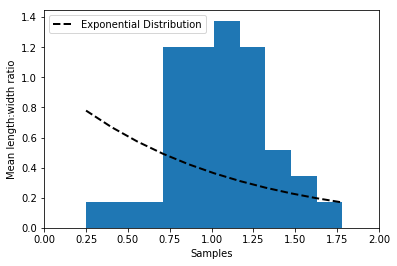

H0: Trilobyte dataset 1 is an exponential distribution
p-value = 2.910673673942065e-06
Reject H0 the samples do not
come from an exponential distribution.


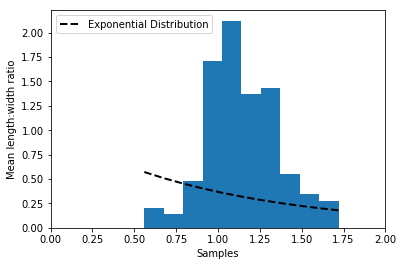

H0: Trilobyte dataset 2 is an exponential distribution
p-value = 6.188180815320315e-10
Reject H0 the samples do not
come from an exponential distribution.


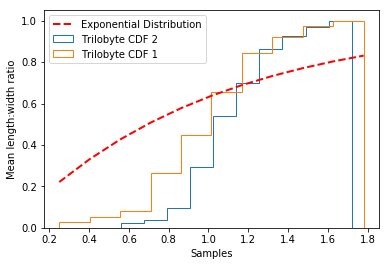

In [3]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read in the records
record1 = np.recfromtxt("../data/triloshape1.csv") 
record2 = np.recfromtxt("../data/triloshape2.csv") 

triloshape1 = np.array(record1, dtype=float)
triloshape2 = np.array(record2, dtype=float)

D, p = stats.ks_2samp(triloshape1, triloshape2)

print ("p-value = {}".format(p))
if p <= 0.05:
    print ("Reject",)
else:
    print ("Accept",)
print ("the hypothesis that the samples comes from the same distribution.")


plt.figure()
# Generate a histogram of the data and overlay the normalised exponential 
# distribution
n, bins, patches = plt.hist(triloshape1, 10, normed=True)
plt.plot(bins,stats.expon.pdf(bins),color = 'k', lw = 2., 
         linestyle='--', label = 'Exponential Distribution')
plt.xlim(0,2)
plt.xlabel("Samples")
plt.ylabel("Mean length:width ratio")
plt.legend(loc = 'best')
plt.show()

D1, p1 = stats.ks_2samp(triloshape1, stats.expon.pdf(bins))
# As before we compare triloshape1 with another dataset. This time
# it is with an exponential distribution.
print ("H0: Trilobyte dataset 1 is an exponential distribution")
print ("p-value = {}".format(p1))
if p1 <= 0.05:
    print ("Reject H0 the samples do not",)
else:
    print ("Accept H0 the samples do",)
print ("come from an exponential distribution.")


# Repeat as just done, for the second set of data
plt.figure()
n, bins, patches = plt.hist(triloshape2, 10, normed=True)
plt.plot(bins,stats.expon.pdf(bins),color = 'k', lw = 2., 
         linestyle='--', label = 'Exponential Distribution')
plt.xlim(0,2)
plt.xlabel("Samples")
plt.ylabel("Mean length:width ratio")
plt.legend(loc = 'best')
plt.show()

D2, p2 = stats.ks_2samp(triloshape2, stats.expon.pdf(bins))
print ("H0: Trilobyte dataset 2 is an exponential distribution")
print( "p-value = {}".format(p2))
if p2 <= 0.05:
    print ("Reject H0 the samples do not",)
else:
    print ("Accept H0 the samples do",)
print ("come from an exponential distribution.")


""" BONUS """

plt.figure()
n1, bins1, patches1 = plt.hist(triloshape2, 10, normed=True, 
                               cumulative=True, histtype = 'step', label = 'Trilobyte CDF 2')
n2, bins2, patches2 = plt.hist(triloshape1, 10, normed=True, 
                               cumulative=True, histtype = 'step', label = 'Trilobyte CDF 1')
plt.plot(bins2, stats.expon.cdf(bins2), color='r', lw=2., 
         linestyle='--', label = 'Exponential Distribution')
plt.xlabel("Samples")
plt.ylabel("Mean length:width ratio")
plt.legend(loc = 'best')
plt.show()

# There was not really any reason to suspect exponetiality however this is a useful exercise
# on manipulating distributions other than normal.